The differnece between this code and `GenDissipativeData.ipynb` is that this code is written for when the POD is applied seperately on V and $\theta$.

This file is copied from GenDissipativeData for SSEs and modified to work for earthquake example.

In [4]:
import numpy as np
import sys
sys.path.append('./../')
from ProcessFunctions import find_Aisv2, Find_a_i,find_Aisv2_onlyv
import matplotlib.pyplot as plt
import cte_eq

In [5]:
T_final=10500
Ntout=cte_eq.Ntout
Nxout=cte_eq.Nxout
drs=0.012

In [6]:
# Loading POD modes for V and Theta
N_m_v_load=30
N_m_theta_load=30
data_dir='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(Ntout)+"Nx="+str(Nxout)+'PODonlyonV'+'drs'+str(drs)+".npz"
PODmodes=np.load(data_dir)
U_v=PODmodes['U']
S_v=PODmodes['S']
# VT_v=PODmodes['VT']
q_bar_v=PODmodes['q_bar']
Sigma_v=np.diagonal(S_v)
Nt2=127534 # This is the number os snapshots used to find the POD, it is fined in the RunForward2D.ipynb
Lambda_v=Sigma_v**2/Nt2
Lambda_v=np.atleast_2d(Lambda_v[:N_m_v_load])
Sigma_v=(np.sqrt(Lambda_v))


data_dir='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(Ntout)+"Nx="+str(Nxout)+'PODonlyontheta'+'drs'+str(drs)+".npz"

PODmodes=np.load(data_dir)
U_theta=PODmodes['U']
S_theta=PODmodes['S']
# VT_theta=PODmodes['VT']
q_bar_theta=PODmodes['q_bar']
Sigma_theta=np.diagonal(S_theta)
Nt2=127534 # This is the number os snapshots used to find the POD, it is fined in the RunForward2D.ipynb
Lambda_theta=Sigma_theta**2/Nt2
Lambda_theta=np.atleast_2d(Lambda_theta[:N_m_theta_load])
Sigma_theta=(np.sqrt(Lambda_theta))




./../ProcessFunctions.py:3410: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(Ratio[:, col], ax=ax, color=color, label='$i={{{0}}}$'.format(col+1),clip=(None, None),bw=0.4)
./../ProcessFunctions.py:3410: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(Ratio[:, col], ax=ax, color=color, label='$i={{{0}}}$'.format(col+1),clip=(None, None),bw=0.4)
./../ProcessFunctions.py:3410: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


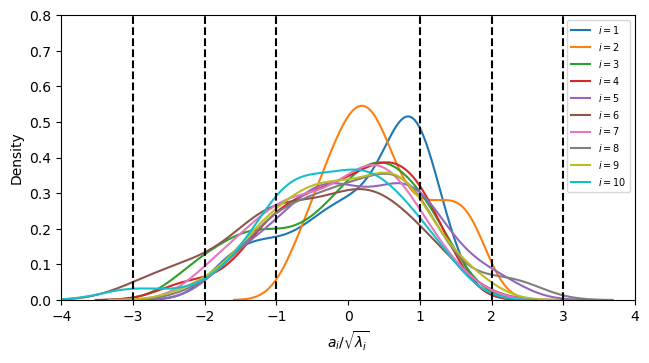

In [7]:
# Checking the distribution for v
V_thresh=1
T_final_run=350
# Nt=5
N_m_load=30
coeff=1
number=1
data_dir='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/SampleSimulation_Tf_2D'+str(T_final_run)+"Nt="+str(cte_eq.Ntout)+"N_m"+str(N_m_load)+"coeff"+str(coeff)+"number"+str(number)+".npz"
data_smaple=np.load(data_dir)
V_ox=data_smaple['array1']
theta_ox=data_smaple['array2']
t_ox=data_smaple['array3']
# We work we log10 of V_ox:
V_ox=np.log10(V_ox)
theta_ox=np.log10(theta_ox)
A,P=find_Aisv2_onlyv(U_v,V_ox,q_bar_v,N_m_load) # you dont need P in general, but I need it to check if I do everything correctly
Find_a_i(P,N_m_load,U_v,S_v,Nt2,V_thresh)

./../ProcessFunctions.py:3410: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(Ratio[:, col], ax=ax, color=color, label='$i={{{0}}}$'.format(col+1),clip=(None, None),bw=0.4)
./../ProcessFunctions.py:3410: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(Ratio[:, col], ax=ax, color=color, label='$i={{{0}}}$'.format(col+1),clip=(None, None),bw=0.4)
./../ProcessFunctions.py:3410: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


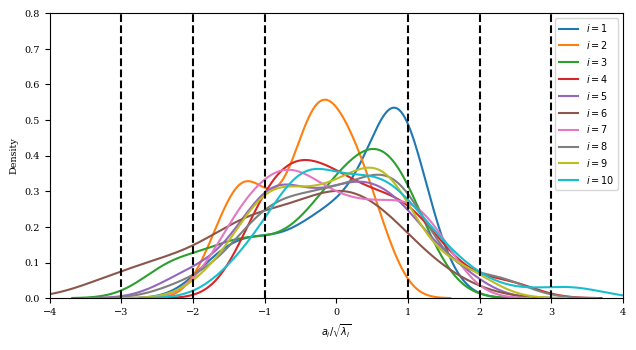

In [8]:
# Checking the distribution for theta



A,P=find_Aisv2_onlyv(U_theta,theta_ox,q_bar_theta,N_m_load) # you dont need P in general, but I need it to check if I do everything correctly
Find_a_i(P,N_m_load,U_theta,S_theta,Nt2,V_thresh)

# Generate Data

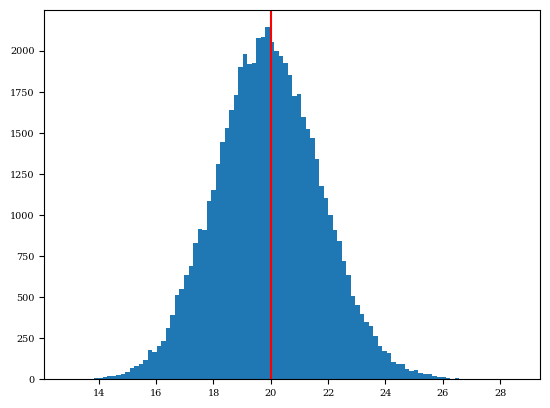

In [9]:
# Generate random initial conditions
# for the points to start from outer ellipse I need to manupilate the scale. The excpected norm of the x is sqrt(N_m*scale).
# I want sqrt(N_m*scale)=13
# Then scale should be sqrt(13^2/N_m)
N_theta=30
N_v=30
N_m=N_theta+N_v
radi_outer=20
N_points=60000
scale=np.sqrt(radi_outer**2/N_m)
points=np.random.normal(loc=0,scale=scale,size=(N_m,N_points))
# Look at the distribution of the norms of the points:
norm_points=np.linalg.norm(points,axis=0)
plt.hist(norm_points, bins=100)
plt.axvline(radi_outer, color='red')

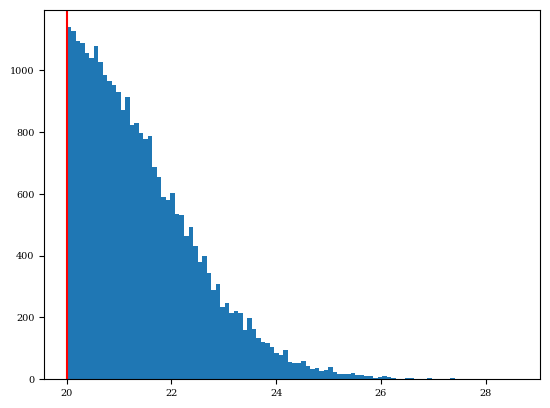

In [10]:
# Now I write a loop to get rid of the points that have the norm less than radi_outer (we will roughly loose half of the points)
points_2=[]
for i in range(N_points):
    if np.linalg.norm(points[:,i])>radi_outer:
        points_2.append(points[:,i])
points_2=np.array(points_2).T
norm_points=np.linalg.norm(points_2,axis=0)
plt.hist(norm_points, bins=100)
plt.axvline(radi_outer, color='red')

In [11]:
# I want to recduce the norm as the dynamical system evolves in two step by a factor of 12/13 (so the radius changes from 13 to 12)
N_steps=2
radi_inner=19
alpha=radi_inner/radi_outer
beta=-np.log(alpha)/N_steps
A_system=-beta*np.eye(N_m)

# defining a linear differntial equation for the system in the form of x_dot=Ax where A is a diagonal matrix with negative eigenvalues all equal to -beta
# Now we solve the system using the initial conditions in the points array
# defining the system of differential
def f(t, x):
    return A_system  @ x
# solving the system using the initial conditions in the points_2 array
from scipy.integrate import solve_ivp
t_span = (0, N_steps)
t_eval = np.linspace(*t_span, N_steps)
solutions = []
for i in range(points_2.shape[1]):
    sol = solve_ivp(f, t_span, points_2[:,i], t_eval=t_eval)
    solutions.append(sol.y)
solution=np.array(solutions)
solution.shape

(28544, 60, 2)

Text(0.5, 1.0, 'perfect! the histogram of the norm of the last step of the solution is what we expect')

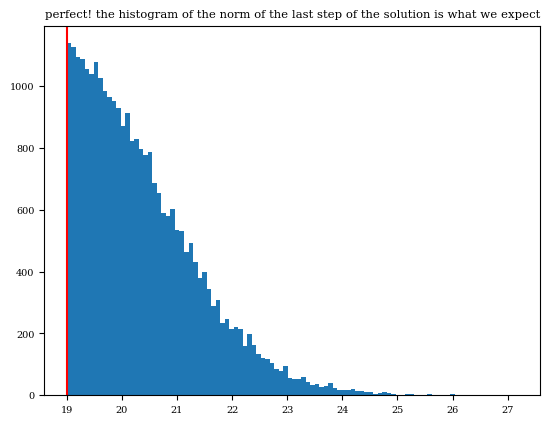

In [12]:
# plotting the histogram of the norm of the last step of the solution for all of the points

norm_solution=np.linalg.norm(solution[:,:,-1],axis=1)
plt.hist(norm_solution, bins=100)
plt.axvline(radi_inner, color='red')
# 
plt.title('perfect! the histogram of the norm of the last step of the solution is what we expect')

Text(0.5, 1.0, 'The histogram of the norm of the input and output of the system after two time steps')

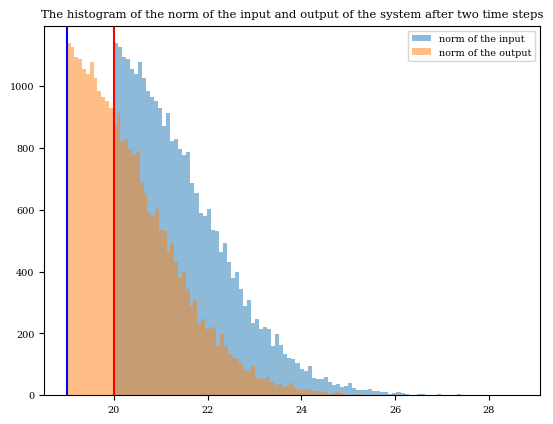

In [13]:
Input=solution[:,:,0]
Output=solution[:,:,-1]-solution[:,:,0]
norm_Input=np.linalg.norm(Input,axis=1)
norm_Output=np.linalg.norm(solution[:,:,-1],axis=1)
# plotting the histogram of norm_Input and norm_Output with a bit transparancy for visibility
plt.hist(norm_Input, bins=100, alpha=0.5, label='norm of the input')
plt.hist(norm_Output, bins=100, alpha=0.5, label='norm of the output')
plt.axvline(radi_outer, color='red')
plt.axvline(radi_inner, color='blue')
plt.legend()
plt.title('The histogram of the norm of the input and output of the system after two time steps')
# Now we have the input and output of the system after two time steps

In [14]:
Sigma=np.concatenate((Sigma_v,Sigma_theta),axis=1)


In [15]:
Input_scaled=Input*Sigma
Output_scaled=Output*Sigma


In [16]:
data_dir="/central/groups/astuart/hkaveh/Data/LearnROM/EarthquakeEllipticShell_radi_outer"+str(radi_outer)+"radi_inner"+str(radi_inner)+"PODappliedseperately.npz"
np.savez(data_dir, Input=Input_scaled, Output=Output_scaled)

In [17]:
radi_inner

19

In [18]:
radi_outer

20

In [19]:
Input_scaled.shape

(28544, 60)